### Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions:

1. Load the dataset and explore the variables.

2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

3. Extract the target variable.

4. Extract the independent variables and scale them.

5. Build the logistic regression model.

6. Evaluate the model.

7. Even a simple model will give us more than 70% accuracy. Why?

8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### Load the dataset and explore the variables.

In [4]:
customer_churn = pd.read_csv('customer_churn.csv')
display(customer_churn.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_churn['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

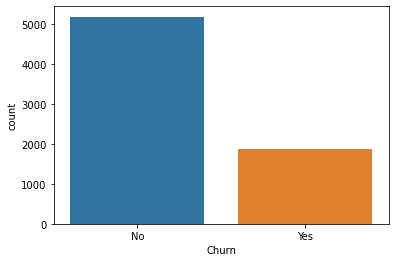

In [6]:
sns.countplot(x='Churn', data=customer_churn);
plt.show()

In [7]:
#checking for non values
customer_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [8]:
customer_churn_df = customer_churn[['tenure', 'SeniorCitizen', 'MonthlyCharges','Churn']]
customer_churn_df.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [19]:
customer_churn_df.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
#df.edjefe.replace(to_replace=['no', 'yes'], value=[0, 1])

/var/folders/gp/9b51lq292y3cr3q0yws8b66r0000gn/T/ipykernel_3571/1153490891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn_df.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)


#### Extract the target variable.

In [20]:
# X/y split
X = customer_churn_df.drop('Churn',axis = 1)
y = customer_churn_df['Churn']

#### Extract the independent variables and scale them.

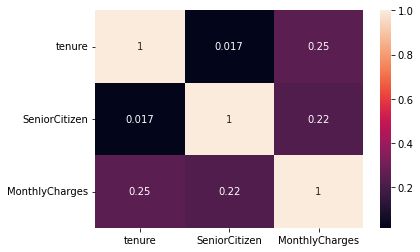

In [21]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) # default test_size value is .2

In [23]:
y_train.isna().sum()
y_test.isna().sum()

0

In [24]:
X_test

,tenure,SeniorCitizen,MonthlyCharges
5806,2,0,19.60
3678,16,0,84.90
4060,54,0,63.35
1577,17,0,98.60
5007,25,0,20.60
...,...,...,...
5386,10,0,45.80
6813,64,0,47.85
3723,18,0,20.45
6849,30,0,83.55


In [25]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well



In [26]:
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index) #  'index=X_test.index' keeps the index to identify 
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
6857,1.040068,-0.441614,0.923801
4435,-0.624290,-0.441614,0.514571
6444,-0.055973,-0.441614,0.479778
4247,1.486604,-0.441614,1.371138
2404,0.390563,-0.441614,0.976819


#### Build the logistic regression model.

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=2, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=2)

In [28]:
lr.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
lr.predict_proba(X_train_scaled)

array([[0.89164398, 0.10835602],
       [0.54889551, 0.45110449],
       [0.73345125, 0.26654875],
       ...,
       [0.52778195, 0.47221805],
       [0.98089714, 0.01910286],
       [0.95699946, 0.04300054]])

In [30]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1] # see array above

1.0

In [40]:
lr.predict_proba(X_train_scaled)[0,0] 

0.8916439775981699

In [41]:
lr.predict_proba(X_train_scaled)[0,1]

0.10835602240183008

In [42]:
lr.predict_proba(X_train_scaled).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [32]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

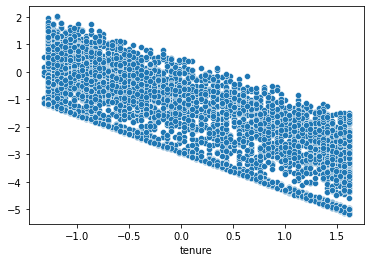

In [33]:
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

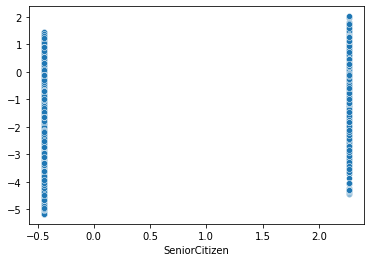

In [34]:
sns.scatterplot(y = logits,x = X_train_scaled['SeniorCitizen']);
plt.show()

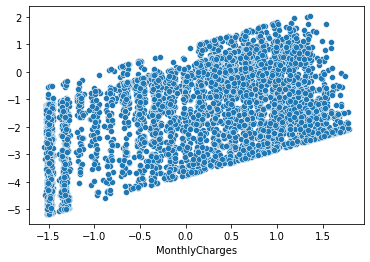

In [35]:
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


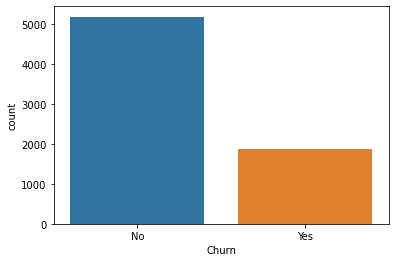

In [36]:
count_classes = customer_churn['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = customer_churn);
plt.show()

In [37]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[1]+count_classes[1])))

The class imbalance ratio is: 0.88


#### Evaluate the model.

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.79


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.60
The recall in the TEST set is: 0.44
The F1 in the TEST set is: 0.51
The Kappa in the TEST set is: 0.37


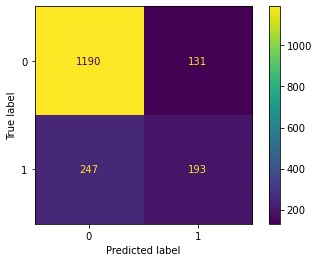

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

#### Even a simple model will give us more than 70% accuracy. Why?

#### Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [51]:
y_train_SMOTE.value_counts()

0    3853
1    3853
Name: Churn, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.46
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.56
The Kappa in the TEST set is: 0.37


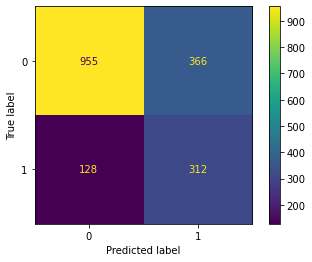

In [53]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()